Taehyeok Kwon

IMDb Score Predictor With Video in Neflix

Introduction
Have you ever heard 'Squid Game', 'Money Heighst', and 'Narcos'? People can not watch the TV Show if you could not turn on TV at specific time. Also, they can not watch movies if you could not go movie theater. Another way is rental. Nowaday, the society has been advanced and internet has become widespreded. Everyone has mini version of their own theater. Even people can watch movie and TV show with smartphone in their hand. Everyone can watch video what they want in anytime and anywhere. Obiously, the market of TV show and movie has gotten and getting grow up. Netflix is the greatest beneficiary in this market. 

In this project, I will analyze the contents in the Neflix with the datasets from contents review site 'IMDb' to detemine which contents are most beloved by viewer. I will examine which variables influence these scores and make predictions using a predictive model

Data collection

In this project, the imptant variable is obviously IMBd score. I could get the file from 'Kaggle' that include the IMDb data for the video on Netflix. As one of viewers, I thought some variables what affect the scores. Directors, actors and genres can be one of factors that I pick a video. Even if I do not think runtime, age cetification and types of movie like TV show or movie can be factors, I put these for analyzing data because the machine can have insights from a different perspective.

•	Title: The name of movie or TV show
•	Description: it describes the video in briefly.
•	Release year: the year of the video has been made 
•	IMDb score: the score that the video got by viewers.
•	IMDb ID: Unique ID number that given by IMDb to recognize the video.
•	IMDb votes: the number that shows how many people voted for score
•	Actor: the cast in the movies or TV shows
•	Director: the directors who made the video.
•	Age certification: the symbol that represents what ages are allowed for watch
•	Run time: How long does it take to watch this video fromstart to end.
•	Type: The type of video such as TV show or Movie

In [1]:
# To call libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

C:\Users\bbero\AppData\Local\Temp\ipykernel_17464\1633942019.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#To call data with csv file which is from Kaggle
data = pd.read_csv("Netflix TV Shows and Movies.csv")
data

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


In [3]:
#To show the impotant columns
selected_columns = data[['title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'imdb_score', 'imdb_votes']]
selected_columns.head(5)

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


I got another file that contain actors data. The data which I called first does not contain actors data, so I downloaded actor data, but it is not just for Neflix videos.

In [4]:
#to call actors data
actor_films = pd.read_csv("actorfilms.csv")
actor_films

,Actor,ActorID,Film,Year,Votes,Rating,FilmID
0,Fred Astaire,nm0000001,Ghost Story,1981,7731,6.3,tt0082449
1,Fred Astaire,nm0000001,The Purple Taxi,1977,533,6.6,tt0076851
2,Fred Astaire,nm0000001,The Amazing Dobermans,1976,369,5.3,tt0074130
3,Fred Astaire,nm0000001,The Towering Inferno,1974,39888,7.0,tt0072308
4,Fred Astaire,nm0000001,Midas Run,1969,123,4.8,tt0064664
...,...,...,...,...,...,...,...
191868,Roman Griffin Davis,nm9877392,Jojo Rabbit,2019,310904,7.9,tt2584384
191869,Lexi Rabe,nm9962642,Silk Road,2021,2050,5.9,tt7937254
191870,Lexi Rabe,nm9962642,Avengers: Endgame,2019,849079,8.4,tt4154796
191871,Lexi Rabe,nm9962642,Godzilla: King of the Monsters,2019,146737,6.0,tt3741700


I needed combine two data for analysizing. The actors get too many rows, so I combined actors and put in the actor column by one title.
The IMDb ID is primary key of main data, and it also is foreign key of actor film data.

In [5]:
data['imdb_id'] = data['imdb_id'].astype(str)
actor_films['FilmID'] = actor_films['FilmID'].astype(str)
merged_data = pd.merge(data, actor_films[['FilmID', 'Actor']], left_on='imdb_id', right_on='FilmID', how='left')
merged_data.drop(['FilmID'], axis=1, inplace=True) 
merged_data['Actor'] = merged_data.groupby('imdb_id')['Actor'].transform(lambda x: ', '.join(x.dropna().unique()))
merged_data = merged_data.drop_duplicates()
merged_data

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes,Actor
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0,"Robert De Niro, Jodie Foster, Harvey Keitel, M..."
9,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0,"John Cleese, Terry Gilliam, Graham Chapman, Er..."
16,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0,"John Cleese, Terry Gilliam, Graham Chapman, Er..."
22,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0,"Linda Blair, Ellen Burstyn, Max von Sydow, Lee..."
27,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0,
...,...,...,...,...,...,...,...,...,...,...,...,...
11780,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0,
11781,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0,
11782,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0,
11783,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0,


I thought the variable is not enough. I need directors data and genres.

In [6]:
#To call the data which contain genres and director and language and country.
movie_data = pd.read_csv("movie_data.csv")

movie_data['IMDb ID'] = movie_data['movie_imdb_link'].apply(lambda x: x.split("/title/")[1].split("/")[0])
movie_data['IMDb ID'] = movie_data['movie_imdb_link'].apply(lambda x: re.search(r'(tt\d+)', x).group(1) if re.search(r'(tt\d+)', x) else None)
movie_data['IMDb ID'] = movie_data['IMDb ID'].astype(str)

merged_data = pd.merge(merged_data, movie_data[['IMDb ID','language', 'country','genres','director_name']], left_on='imdb_id', right_on='IMDb ID', how='left')
merged_data.drop(['IMDb ID'], axis=1, inplace=True) 

merged_data.head(5)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes,Actor,language,country,genres,director_name
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0,"Robert De Niro, Jodie Foster, Harvey Keitel, M...",English,USA,Crime|Drama,Martin Scorsese
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0,"John Cleese, Terry Gilliam, Graham Chapman, Er...",English,UK,Adventure|Comedy|Fantasy,Terry Gilliam
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0,"John Cleese, Terry Gilliam, Graham Chapman, Er...",NaN,NaN,NaN,NaN
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0,"Linda Blair, Ellen Burstyn, Max von Sydow, Lee...",English,USA,Horror,William Friedkin
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0,,NaN,NaN,NaN,NaN


In [7]:
#To rename columns 
new_column_names = {
    'index': 'Index',
    'id': 'ID',
    'title': 'Title',
    'type': 'Type',
    'description': 'Description',
    'release_year': 'Release Year',
    'age_certification': 'Age Certification',
    'runtime': 'Runtime',
    'imdb_id': 'IMDb ID',
    'imdb_score': 'IMDb Score',
    'imdb_votes': 'IMDb Votes',
    'Actor' : 'Actor',
    'language':'Language',
    'country' : 'Country',
    'genres' : 'Genres',
    'director_name': 'Director'
}

# Rename the columns using the rename method
merged_data = merged_data.rename(columns=new_column_names)
merged_data.head(5)

,Index,ID,Title,Type,Description,Release Year,Age Certification,Runtime,IMDb ID,IMDb Score,IMDb Votes,Actor,Language,Country,Genres,Director
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0,"Robert De Niro, Jodie Foster, Harvey Keitel, M...",English,USA,Crime|Drama,Martin Scorsese
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0,"John Cleese, Terry Gilliam, Graham Chapman, Er...",English,UK,Adventure|Comedy|Fantasy,Terry Gilliam
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0,"John Cleese, Terry Gilliam, Graham Chapman, Er...",NaN,NaN,NaN,NaN
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0,"Linda Blair, Ellen Burstyn, Max von Sydow, Lee...",English,USA,Horror,William Friedkin
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0,,NaN,NaN,NaN,NaN


Data Cleaning

1. Dealing with missing data
2. Removing the outliers
3. Transform type for convinent
4. Nomarlize the data

In [8]:
# 결측치 제거
merged_data.dropna(subset=['IMDb Score'], inplace=True)

# 이상치 제거
Q1 = merged_data['IMDb Score'].quantile(0.25)
Q3 = merged_data['IMDb Score'].quantile(0.75)
IQR = Q3 - Q1
merged_data = merged_data[(merged_data['IMDb Score'] >= Q1 - 1.5 * IQR) & (merged_data['IMDb Score'] <= Q3 + 1.5 * IQR)]

#To set data type 
merged_data['Release Year'] = pd.to_datetime(merged_data['Release Year'], format='%Y')

#To normalize data 
scaler = MinMaxScaler()
merged_data['Normalized Score'] = scaler.fit_transform(merged_data[['IMDb Score']])

Data Ananlysis
I will compare the variables I guess it affect score with IMDb score which, then I will determine whether the variable really affect the score.

TV show VS Movie 
There is two types of the titles in Neflix. It is TV show and movie. Which type get more score. Typically, the story of movie end in single episode, but TVshow is not like movie the story of TVshow does not end in single episode. Even it goes through multiple seasons. Therefore, each types have different features. I will check whether this features affect score or not by using T-test with means. P-value will show the hypothesis is significance or not.

Mean IMDb Score for Movies: 6.3253273809523805
Mean IMDb Score for TV Shows: 7.042818863879957
Median IMDb Score for Movies: 6.4
Median IMDb Score for TV Shows: 7.2


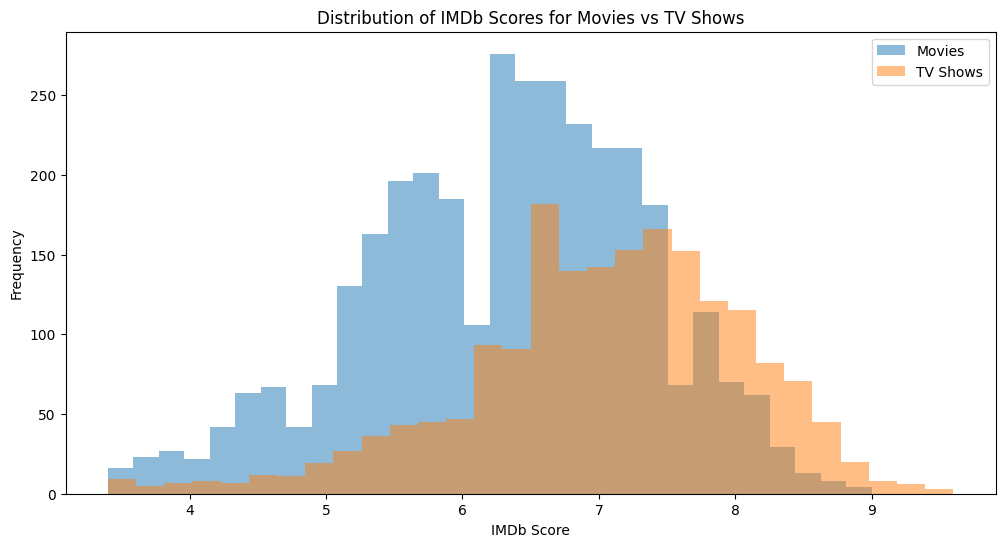

<Figure size 800x600 with 0 Axes>

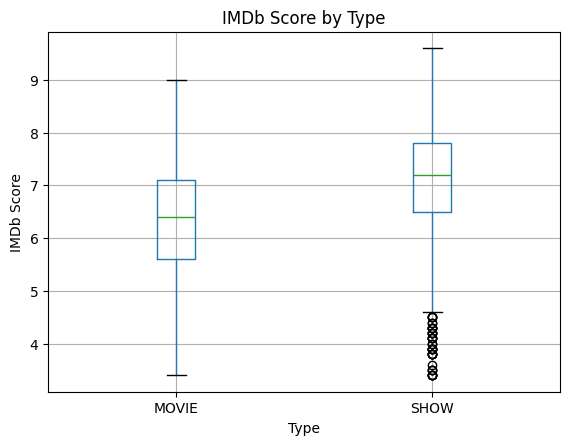

T-test statistic: -24.19478045664812, P-value: 1.13855480713346e-122


In [9]:
#To seperate two types
movie_scores = merged_data[merged_data['Type'] == 'MOVIE']['IMDb Score']
tv_show_scores = merged_data[merged_data['Type'] == 'SHOW']['IMDb Score']

#To calculate mean and median with two types
movie_mean = movie_scores.mean()
tv_show_mean = tv_show_scores.mean()
movie_median = movie_scores.median()
tv_show_median = tv_show_scores.median()

#To show results
print(f"Mean IMDb Score for Movies: {movie_mean}")
print(f"Mean IMDb Score for TV Shows: {tv_show_mean}")
print(f"Median IMDb Score for Movies: {movie_median}")
print(f"Median IMDb Score for TV Shows: {tv_show_median}")

plt.figure(figsize=(12, 6))
plt.hist(movie_scores, alpha=0.5, label='Movies', bins=30)
plt.hist(tv_show_scores, alpha=0.5, label='TV Shows', bins=30)
plt.title('Distribution of IMDb Scores for Movies vs TV Shows')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#to show result of T-test and boxplot 
plt.figure(figsize=(8, 6))
merged_data.boxplot(column='IMDb Score', by='Type')
plt.title('IMDb Score by Type')
plt.suptitle('')  # Suppress the default title to clean up the plot
plt.xlabel('Type')
plt.ylabel('IMDb Score')
plt.show()
t_stat, p_val = ttest_ind(movie_scores.dropna(), tv_show_scores.dropna())
print(f"T-test statistic: {t_stat}, P-value: {p_val}")



The extremely low p-value indicates a statistically significant difference in IMDb scores between movies and TV shows. The analysis revealed that TV shows tend to receive higher average scores compared to movies.

Genre VS Score

I prefer to watch specific genre of movie that is action movie. Almost all people has their own taste such as comedy, horror and etc. 

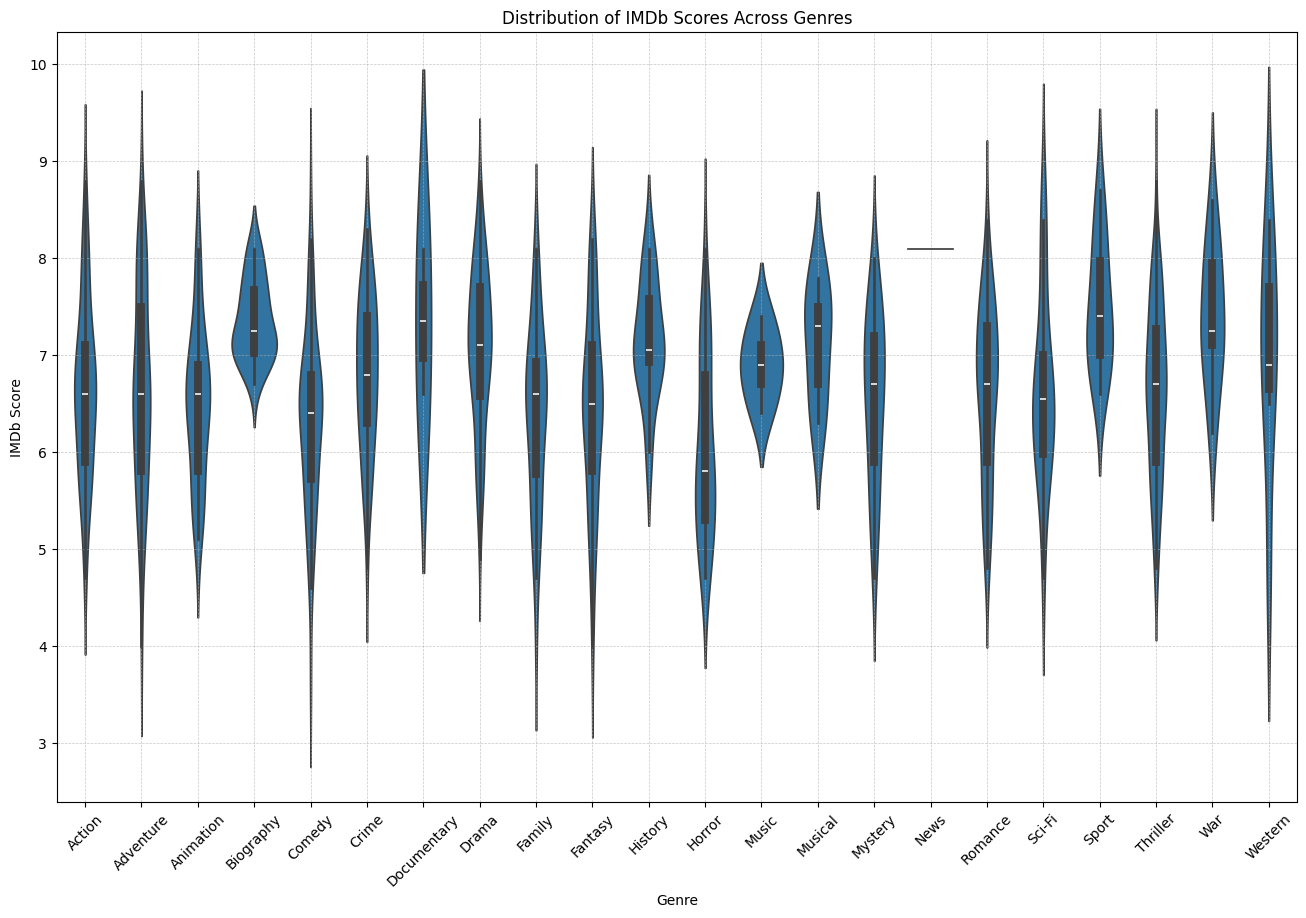

In [10]:
all_genres = merged_data['Genres'].str.get_dummies(sep='|')

genre_scores = pd.DataFrame()

for genre in all_genres.columns:
    
    temp_df = merged_data[all_genres[genre] == 1].copy()
    temp_df['Genre'] = genre  
    temp_df['IMDb Score'] = merged_data['IMDb Score']  
    genre_scores = pd.concat([genre_scores, temp_df], ignore_index=True)


plt.figure(figsize=(16, 10))
sns.violinplot(data=genre_scores, x='Genre', y='IMDb Score')
plt.title('Distribution of IMDb Scores Across Genres')
plt.xlabel('Genre')
plt.ylabel('IMDb Score')
plt.xticks(rotation=45)  
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

According to the violin plot graph, some genres got higher median. Documentary got highest median and horror got lowest median. The western, comedy and adventure have long tails in the distributions. It means there is large variance.

Country VS Score
When considering TV shows or movies, we often associate certain genres with specific countries, anticipating the type of content they typically produce. For instance, Japanese animations, Hong Kong action films that dominated an era, and Hollywood blockbusters are all tied closely to their countries of origin. Therefore, I have explored how different countries impact the IMDb scores of the content they produce.

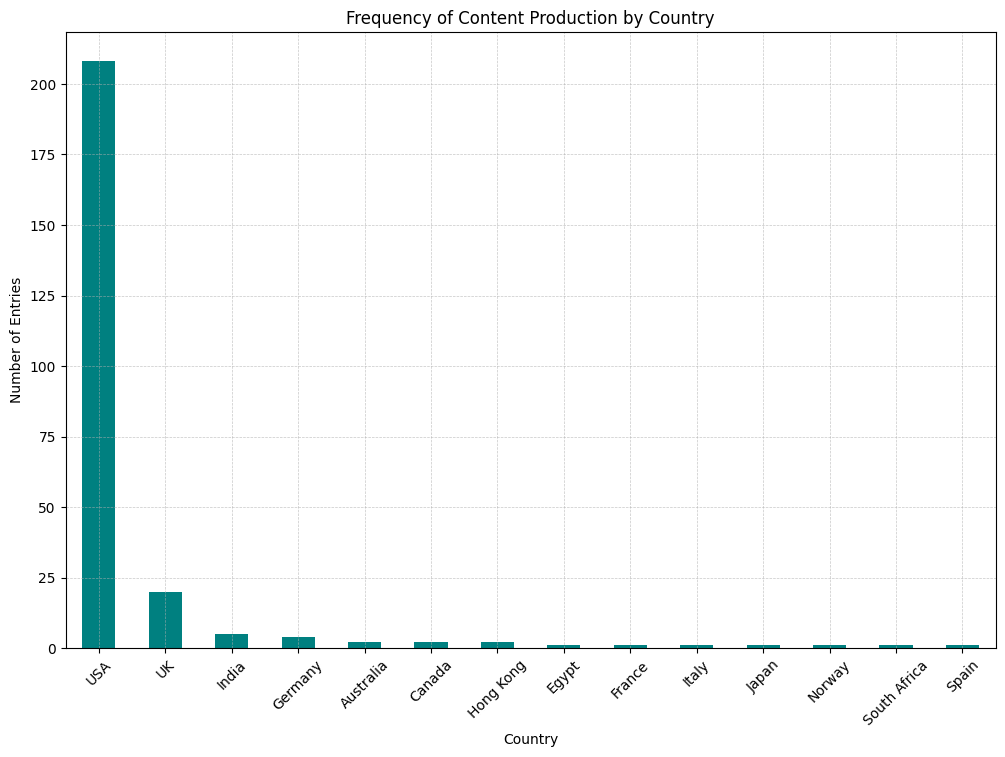

In [11]:
merged_data['Country'] = merged_data['Country'].str.split(',')
country_counts = merged_data.explode('Country').groupby('Country').size().sort_values(ascending=False)
plt.figure(figsize=(12, 8))  # Set the size of the figure
country_counts.head(20).plot(kind='bar', color='teal')  # Limit to top 20 countries for readability
plt.title('Frequency of Content Production by Country')
plt.xlabel('Country')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)  # Rotate country names for better readability
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

I expected that the country of origin would significantly influence the IMDb scores. Upon examining the data, it was clear that productions from the USA overwhelmingly dominated the dataset. Therefore, considering the correlation between scores and the frequency of productions from each country seemed less meaningful. Instead, I only investigated the frequency. It's probably also important to consider that Netflix is an American company, which could explain this dominance.

Director VS Score
When I see familiar director name on advertises which is for introducing new movie, I often expect that the movie will be fun. I even wait to release new movie by some director. I have enjoyed to watch several movies, and I know the movies turns out made by same director later. Names like Christopher Nolan, Martin Scorsese and Quentin Tarantino are almost serve as hallmark of entertaing movie. I will anlyze with the data whether director influence the IMDb score in statically.  

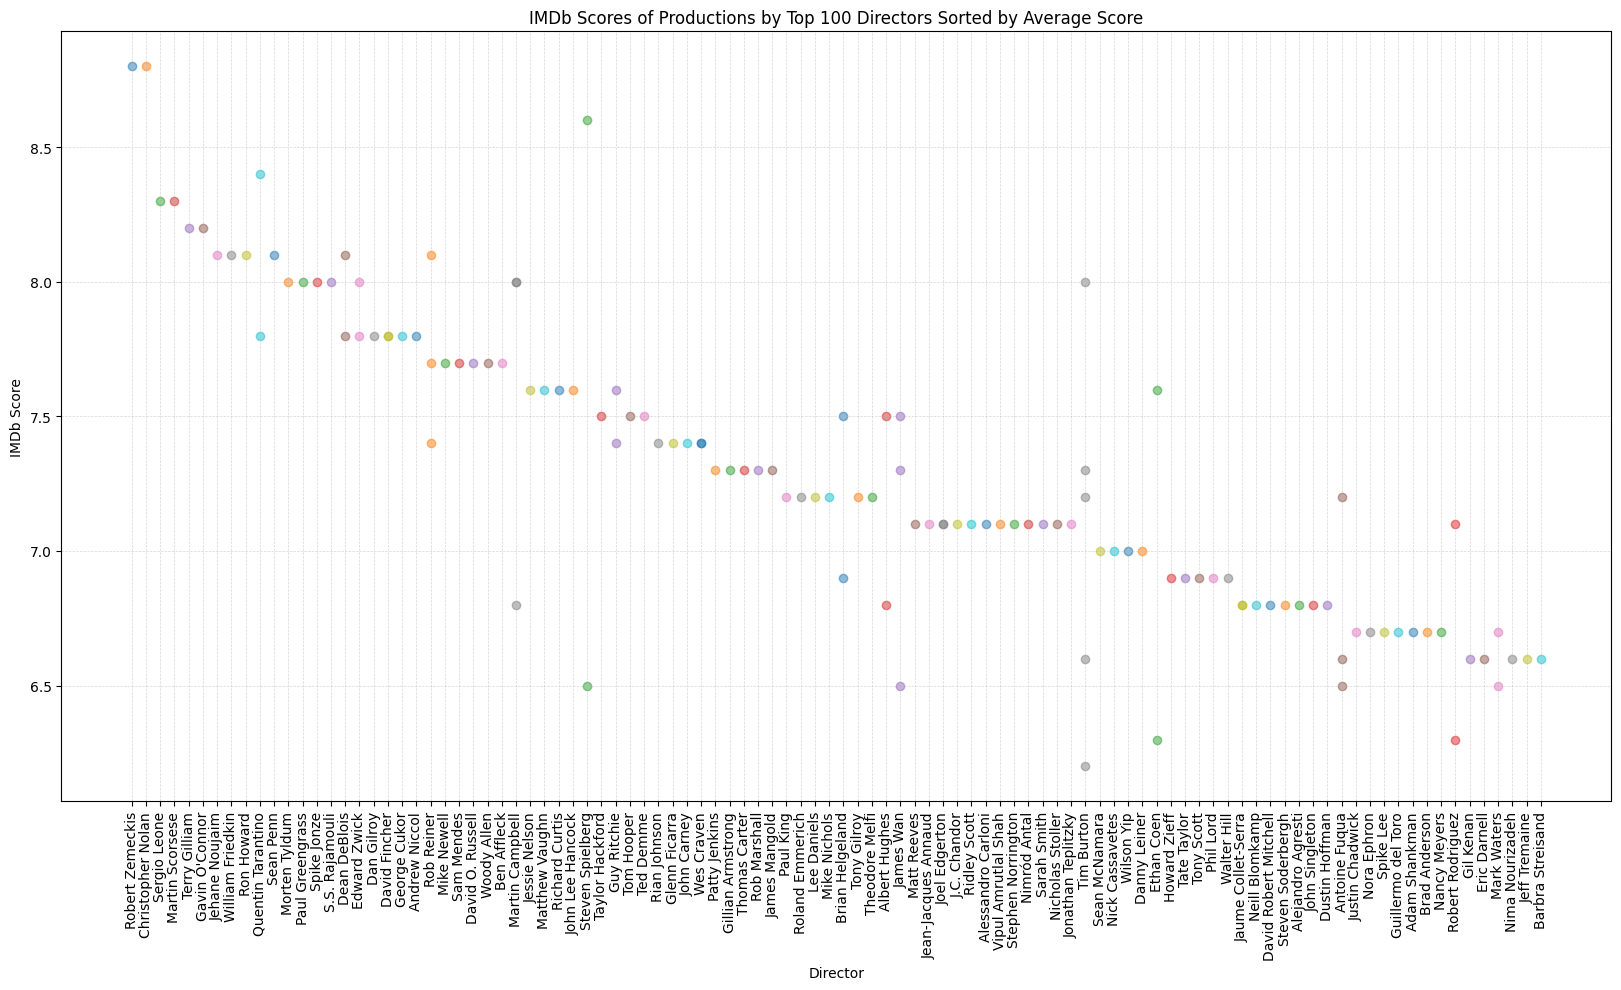

In [12]:
director_aggregate = merged_data.groupby('Director')['IMDb Score'].agg(['mean', 'size']).reset_index()
director_aggregate.columns = ['Director', 'Average Score', 'Production Count']

sorted_directors = director_aggregate.sort_values(by='Average Score', ascending=False).head(100)
plt.figure(figsize=(20, 10))

for index, row in sorted_directors.iterrows():
    
    director_data = merged_data[merged_data['Director'] == row['Director']]
    plt.scatter([row['Director']] * len(director_data), director_data['IMDb Score'], alpha=0.5)


plt.xticks(rotation=90)
plt.title('IMDb Scores of Productions by Top 100 Directors Sorted by Average Score')
plt.xlabel('Director')
plt.ylabel('IMDb Score')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)


plt.show()

This chart is organized in descending order of average scores and shows the number of productions each entity has made.

                            OLS Regression Results                            
Dep. Variable:             IMDb Score   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8635
Date:                Sat, 18 May 2024   Prob (F-statistic):              0.915
Time:                        23:20:21   Log-Likelihood:                -7744.1
No. Observations:                5226   AIC:                         1.589e+04
Df Residuals:                    5026   BIC:                         1.720e+04
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.57

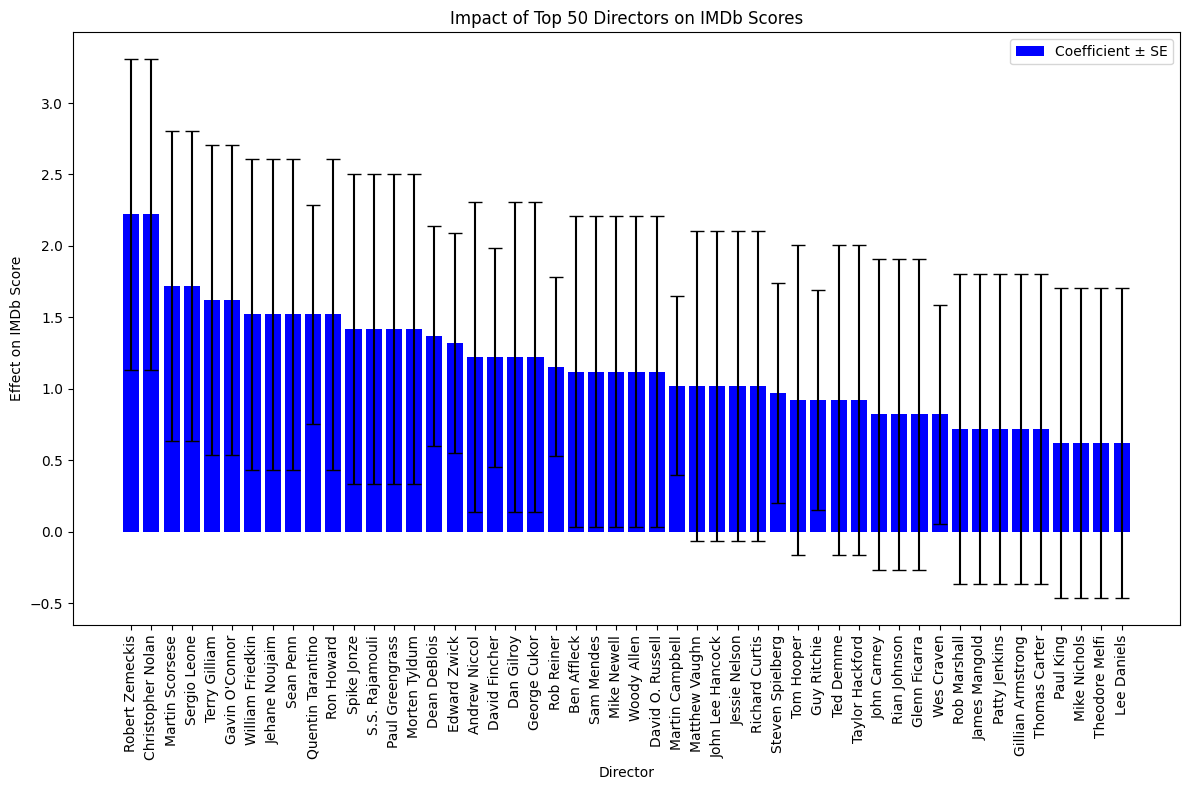

In [13]:
director_dummies = pd.get_dummies(merged_data['Director'], drop_first=True)

X = director_dummies


X = sm.add_constant(X)
X = X.apply(pd.to_numeric, errors='coerce') 
X.dropna(inplace=True) 

y = merged_data['IMDb Score']
y = y.reindex(X.index)
est = sm.OLS(y.astype(float), X.astype(float)).fit()
print(est.summary())

coefficients = est.params[1:]  
std_errors = est.bse[1:]

sorted_indices = coefficients.sort_values(ascending=False).index

top_directors = sorted_indices[:50]
top_coeffs = coefficients[top_directors]
top_errors = std_errors[top_directors]

plt.figure(figsize=(12, 8))
plt.bar(top_directors, top_coeffs, yerr=top_errors, capsize=5, color='b', label='Coefficient ± SE')
plt.xlabel('Director')
plt.ylabel('Effect on IMDb Score')
plt.title('Impact of Top 50 Directors on IMDb Scores')
plt.xticks(rotation=90) 
plt.legend()
plt.tight_layout()  
plt.show()

According chart above, when you see the R square, you can see the number is too low. It means there is no relationship between score and directors. However some directors influence the score.

Release Year VS Score
Some people says the movies or songs in 90s are better than now. Some people every culture have golden era like Renaissance. I determine it is true or not with analyzing data. 

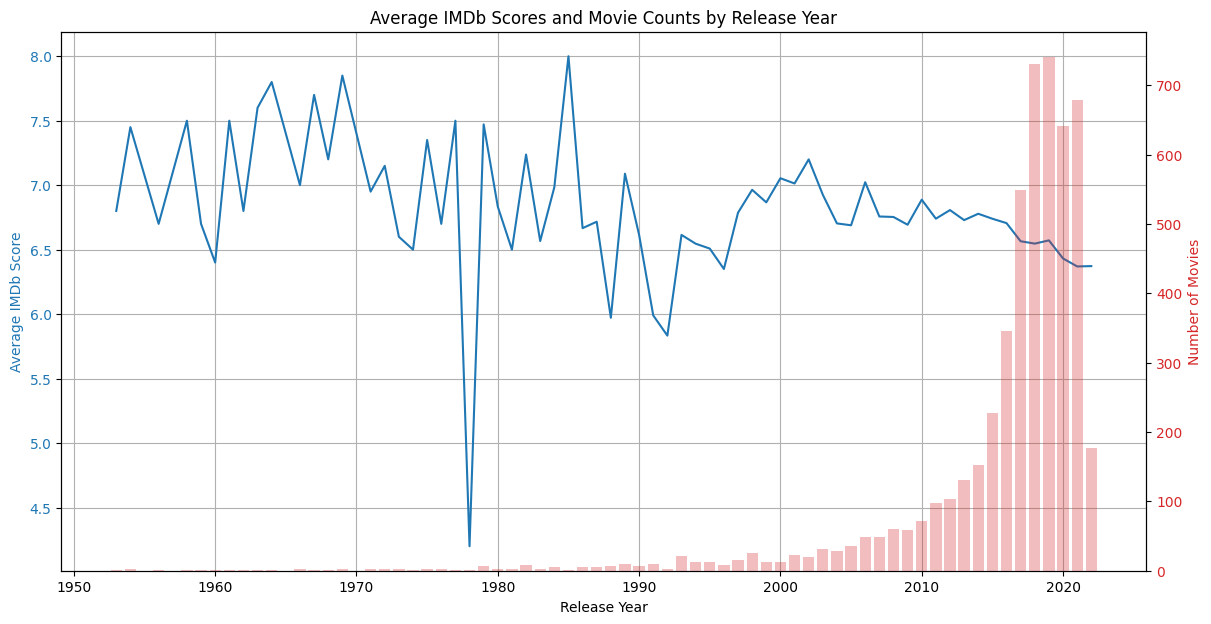

In [14]:
merged_data['Release Year'] = pd.to_datetime(merged_data['Release Year']).dt.year
yearly_scores = merged_data.groupby('Release Year')['IMDb Score'].agg(['mean', 'count']).reset_index()


yearly_scores.sort_values('Release Year', inplace=True)

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Average IMDb Score', color=color)
ax1.plot(yearly_scores['Release Year'], yearly_scores['mean'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx() 
color = 'tab:red'
ax2.set_ylabel('Number of Movies', color=color)  
ax2.bar(yearly_scores['Release Year'], yearly_scores['count'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average IMDb Scores and Movie Counts by Release Year')
ax1.grid(True)

plt.show()

When I see the chart, it seems there is no relationship between release year nad score because the movie in the era 2000-2020 dominant other eras, but the graph for average IMDb score does not move signifcantly after 1980.  

Runtime VS Score
Some people does not try the movie that have long runtime movie. I will analyze this with data. 

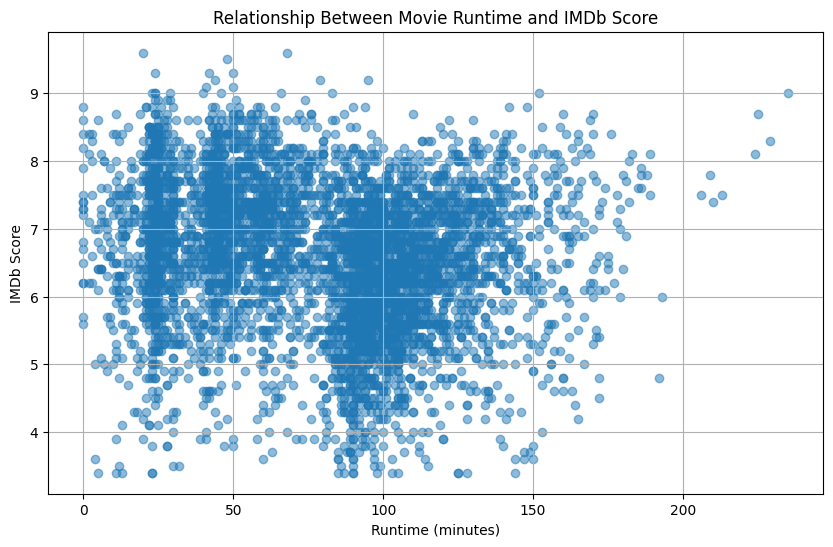

Correlation coefficient between runtime and IMDb score: -0.16352969864087868


In [15]:
merged_data.dropna(subset=['Runtime', 'IMDb Score'], inplace=True)

# Convert 'Runtime' from string to numeric if necessary
merged_data['Runtime'] = pd.to_numeric(merged_data['Runtime'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Runtime'], merged_data['IMDb Score'], alpha=0.5)
plt.title('Relationship Between Movie Runtime and IMDb Score')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.show()

correlation = merged_data[['Runtime', 'IMDb Score']].corr()
print("Correlation coefficient between runtime and IMDb score:", correlation.loc['Runtime', 'IMDb Score'])

According to correlation coefficient above, it is negative number. it means there is no relationship between runtime and score.

Actor VS Score
Some actors have abilaty that pick good movie or shows. Some people just go to watch movie for acting of specific actors. 

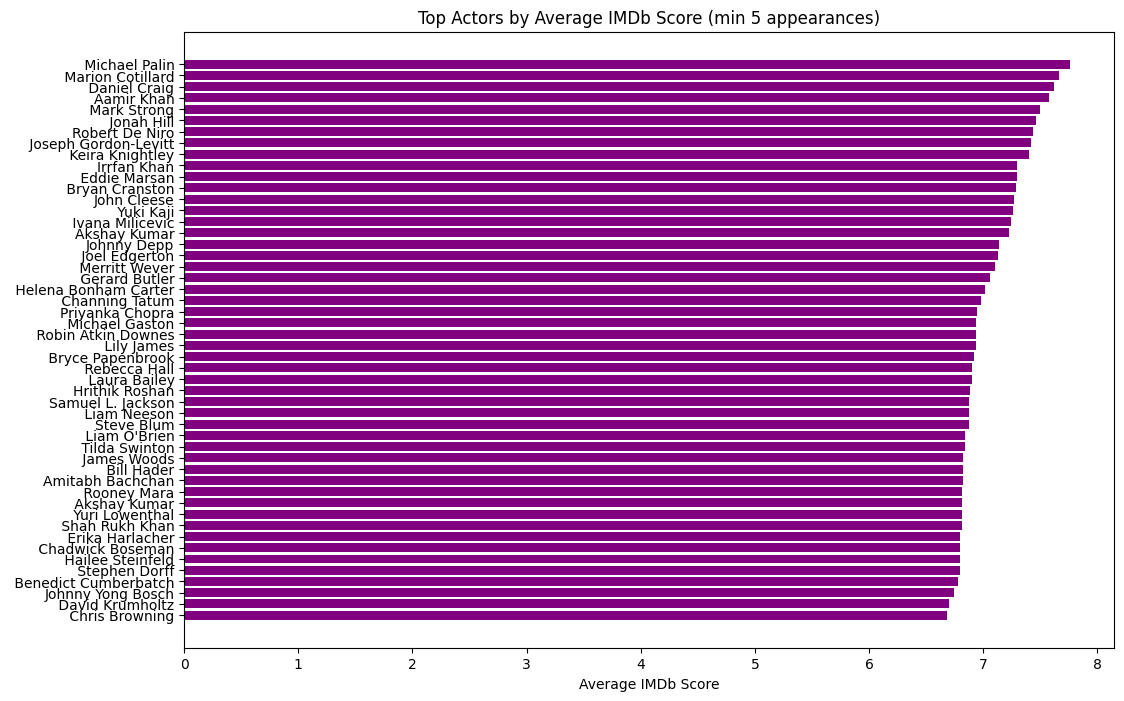

In [16]:
merged_data['Actor'] = merged_data['Actor'].str.split(',')
merged_data_exploded = merged_data.explode('Actor')


actor_performance = merged_data_exploded.groupby('Actor')['IMDb Score'].agg(['mean', 'count'])

filtered_actors = actor_performance[actor_performance['count'] >= 5]

top_actors_by_score = filtered_actors.sort_values(by='mean', ascending=False).head(50)

plt.figure(figsize=(12, 8))
plt.barh(top_actors_by_score.index, top_actors_by_score['mean'], color='purple')
plt.xlabel('Average IMDb Score')
plt.title('Top Actors by Average IMDb Score (min 5 appearances)')
plt.gca().invert_yaxis()  
plt.show()

                            OLS Regression Results                            
Dep. Variable:             IMDb Score   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1.185
Date:                Sat, 18 May 2024   Prob (F-statistic):           1.04e-10
Time:                        23:23:09   Log-Likelihood:                -13666.
No. Observations:               11730   AIC:                         3.622e+04
Df Residuals:                    7284   BIC:                         6.899e+04
Df Model:                        4445                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

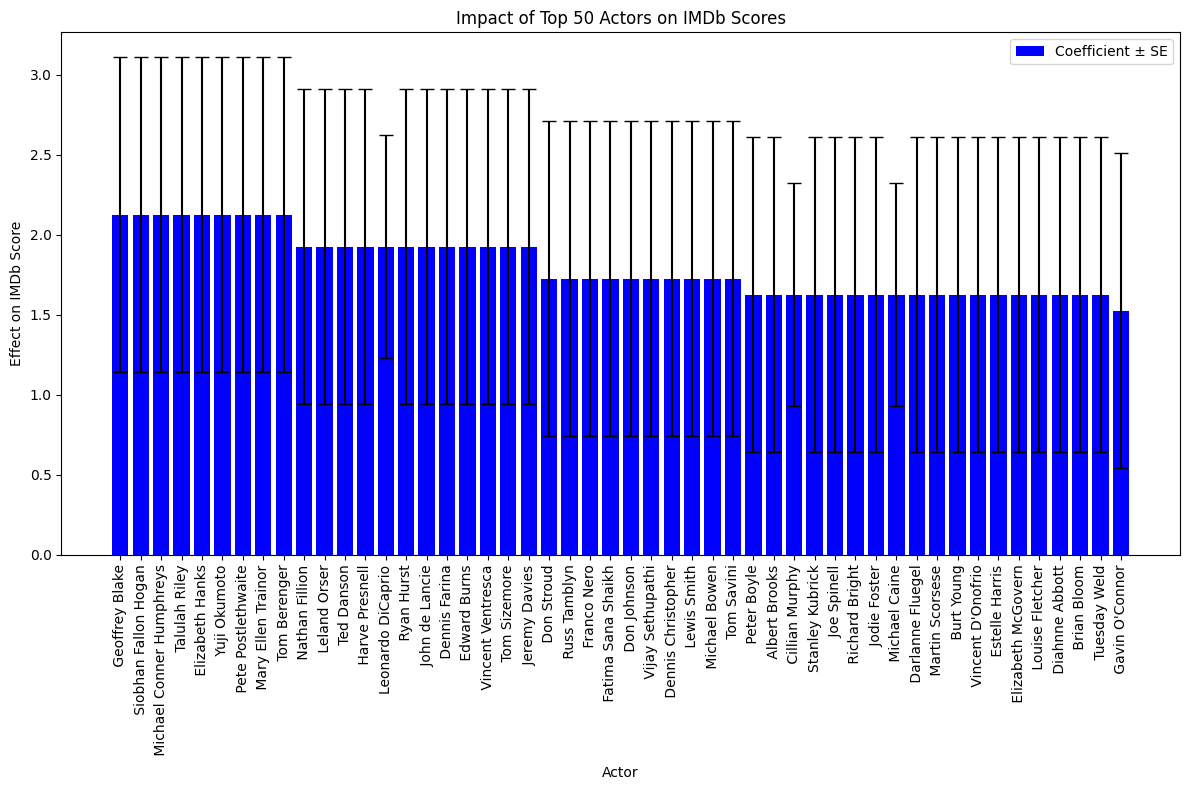

In [17]:
actor_scores = merged_data_exploded.groupby('Actor')['IMDb Score'].agg(['mean', 'count']).reset_index()
actor_dummies = pd.get_dummies(merged_data_exploded['Actor'], drop_first=True)


y = merged_data_exploded['IMDb Score']

X = sm.add_constant(actor_dummies)
X = X.apply(pd.to_numeric, errors='coerce') 
X.dropna(inplace=True)  

y = y.reindex(X.index)
est = sm.OLS(y.astype(float), X.astype(float)).fit()  
print(est.summary())

coefficients = est.params[1:] 
std_errors = est.bse[1:]  

sorted_indices = coefficients.sort_values(ascending=False).index

top_actor = sorted_indices[:50]
top_coeffs = coefficients[top_actor]
top_errors = std_errors[top_actor]

plt.figure(figsize=(12, 8))
plt.bar(top_actor, top_coeffs, yerr=top_errors, capsize=5, color='b', label='Coefficient ± SE')
plt.xlabel('Actor')
plt.ylabel('Effect on IMDb Score')
plt.title('Impact of Top 50 Actors on IMDb Scores')
plt.xticks(rotation=90)  
plt.legend()
plt.tight_layout()  
plt.show()

It seems like the directors case, the r-square, F-statistic and p-value is too low. It means There is no relationship between actors and score. Some actors influence the score, but it is not significant overall.

Modeling

Until now, we have examined the correlation by simply comparing each factor. Now, I will attempt to find predictions using Random Forest, KNN, and Decision Tree models

Random Forest

RMSE: 0.73
MAE: 0.42
      Predicted IMDb Score  Actual IMDb Score
1044              6.657750                7.2
3144              6.017000                6.0
2153              4.370056                4.4
4526              6.128916                7.8
1966              5.400000                5.4


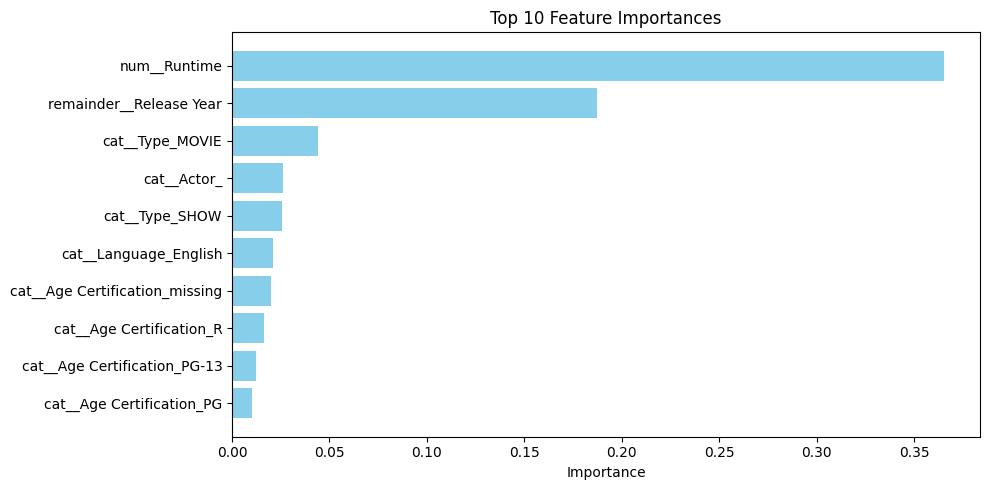

In [18]:
X = merged_data_exploded.drop(['IMDb Score', 'ID', 'Description', 'Title', 'IMDb ID', 'IMDb Votes', 'Index','Normalized Score'], axis=1)
y = merged_data_exploded['IMDb Score']



categorical_features = ['Type', 'Director', 'Genres', 'Country', 'Language', 'Actor', 'Age Certification']
numerical_features = ['Runtime']

for col in ['Actor', 'Director', 'Genres', 'Country', 'Type', 'Language']:
    X[col] = X[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

comparison = pd.DataFrame({'Predicted IMDb Score': y_pred, 'Actual IMDb Score': y_test})
print(comparison.head())


feature_importances = pipeline['regressor'].feature_importances_
feature_names = preprocessor.get_feature_names_out()

top_indices = np.argsort(feature_importances)[-10:]
top_features = [feature_names[i] for i in top_indices]
top_importances = feature_importances[top_indices]

plt.figure(figsize=(10, 5))
plt.title('Top 10 Feature Importances')
plt.barh(top_features, top_importances, align='center', color='skyblue')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

According to the statistic data, Root Mean Squared Error is 0.73, and Mean Absolute Error is 0.42.This indicates that while the model's predictions are generally consistent, there can be a drop in prediction accuracy in specific cases. 

KNN

R^2 Score: 0.52
RMSE: 0.72
      Predicted IMDb Score  Actual IMDb Score
1044                  6.14                7.2
3144                  6.00                6.0
2153                  4.92                4.4
4526                  5.92                7.8
1966                  5.40                5.4


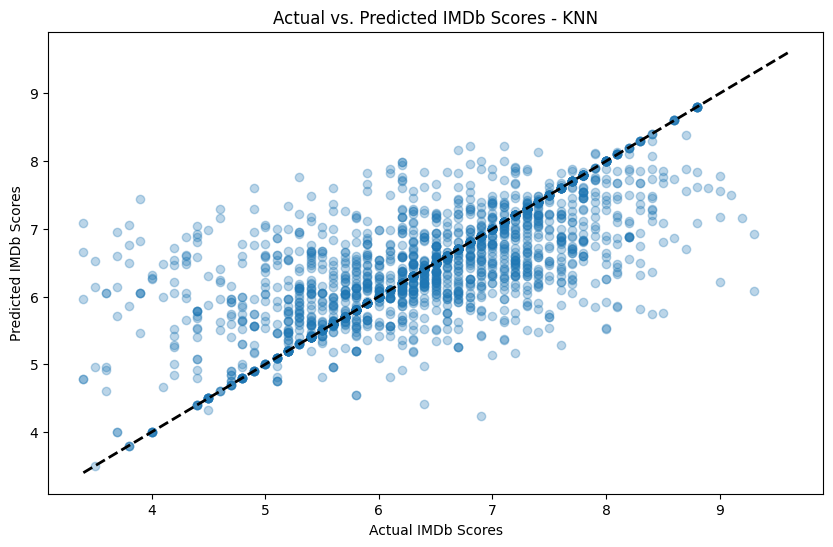

In [19]:
categorical_features = ['Actor', 'Director', 'Genres', 'Country', 'Type', 'Language','Age Certification']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 수치형 데이터에 대한 전처리기
numerical_features = ['Runtime']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 전처리 파이프라인 설정
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numerical_transformer, numerical_features)
], remainder='passthrough')

# KNN 모델 파이프라인 설정
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

# 모델 학습
knn_model.fit(X_train, y_train)

# 모델 평가
y_pred = knn_model.predict(X_test)
score = knn_model.score(X_test, y_test)
rmse = root_mean_squared_error(y_test, y_pred)

# 성능 메트릭 출력
print(f'R^2 Score: {score:.2f}')
print(f'RMSE: {rmse:.2f}')


comparison = pd.DataFrame({'Predicted IMDb Score': y_pred, 'Actual IMDb Score': y_test})
print(comparison.head())


# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual IMDb Scores')
plt.ylabel('Predicted IMDb Scores')
plt.title('Actual vs. Predicted IMDb Scores - KNN')
plt.show()

According to the data, R-square score is 0.52, and Root Mean Squared Error is 0.73. This indicates that the accuracy is not high.

Decision Tree

RMSE: 0.86
MAE: 0.58
      Predicted IMDb Score  Actual IMDb Score
1044              6.385731                7.2
3144              6.700000                6.0
2153              6.385731                4.4
4526              6.385731                7.8
1966              6.000000                5.4


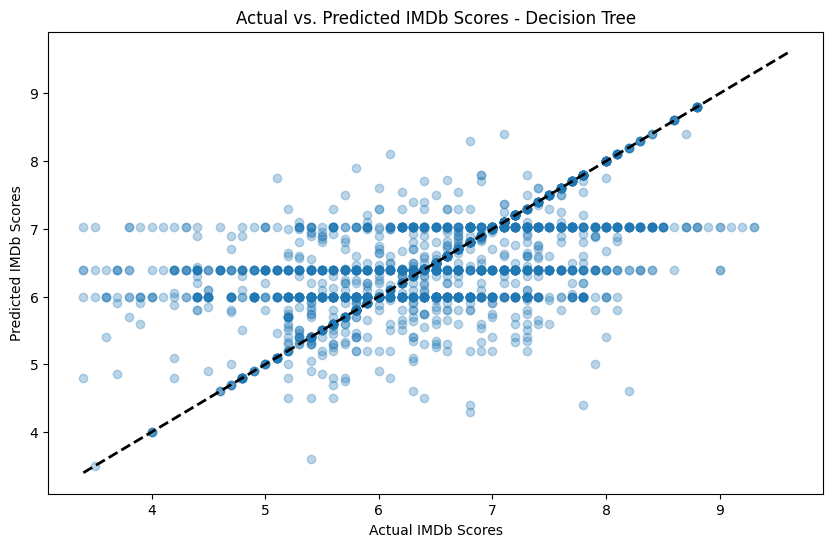

In [20]:
categorical_features = ['Director', 'Actor', 'Genres', 'Country', 'Type', 'Language']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

comparison = pd.DataFrame({'Predicted IMDb Score': y_pred, 'Actual IMDb Score': y_test})
print(comparison.head())

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual IMDb Scores')
plt.ylabel('Predicted IMDb Scores')
plt.title('Actual vs. Predicted IMDb Scores - Decision Tree')
plt.show()

According to the data, R-square score is 0.86, and Root Mean Squared Error is 0.58. This indicates that the accuracy is not high.

Changing Sampling

Some variable like actors and director influence the score, when I test these variable for correlation. Therefore, I guess that the movies which is highly beloved have common significant factors? and it can make predictor? Highly beloved is abstract, so I pick 500 movies that is 500 highst score movies in most voted in decending.   

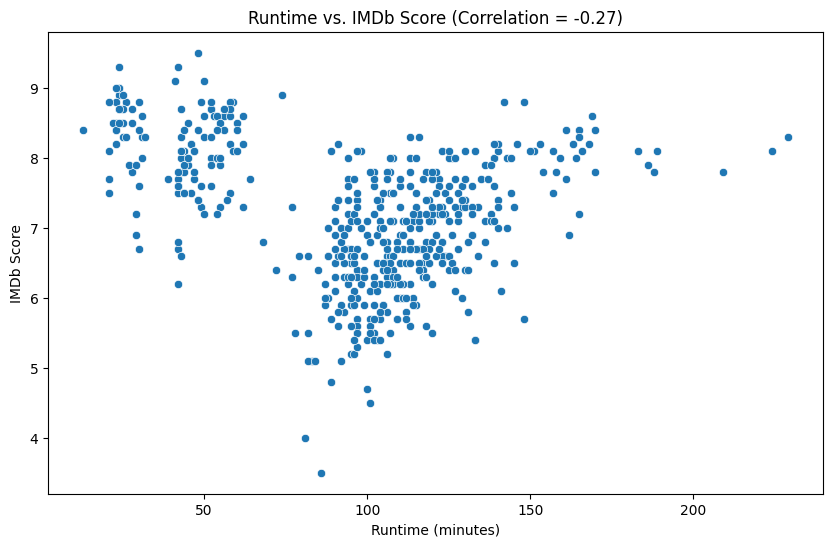

                            OLS Regression Results                            
Dep. Variable:             IMDb Score   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     1.411
Date:                Sat, 18 May 2024   Prob (F-statistic):            0.00480
Time:                        23:24:00   Log-Likelihood:                -576.01
No. Observations:                 500   AIC:                             1470.
Df Residuals:                     341   BIC:                             2140.
Df Model:                         158                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.40

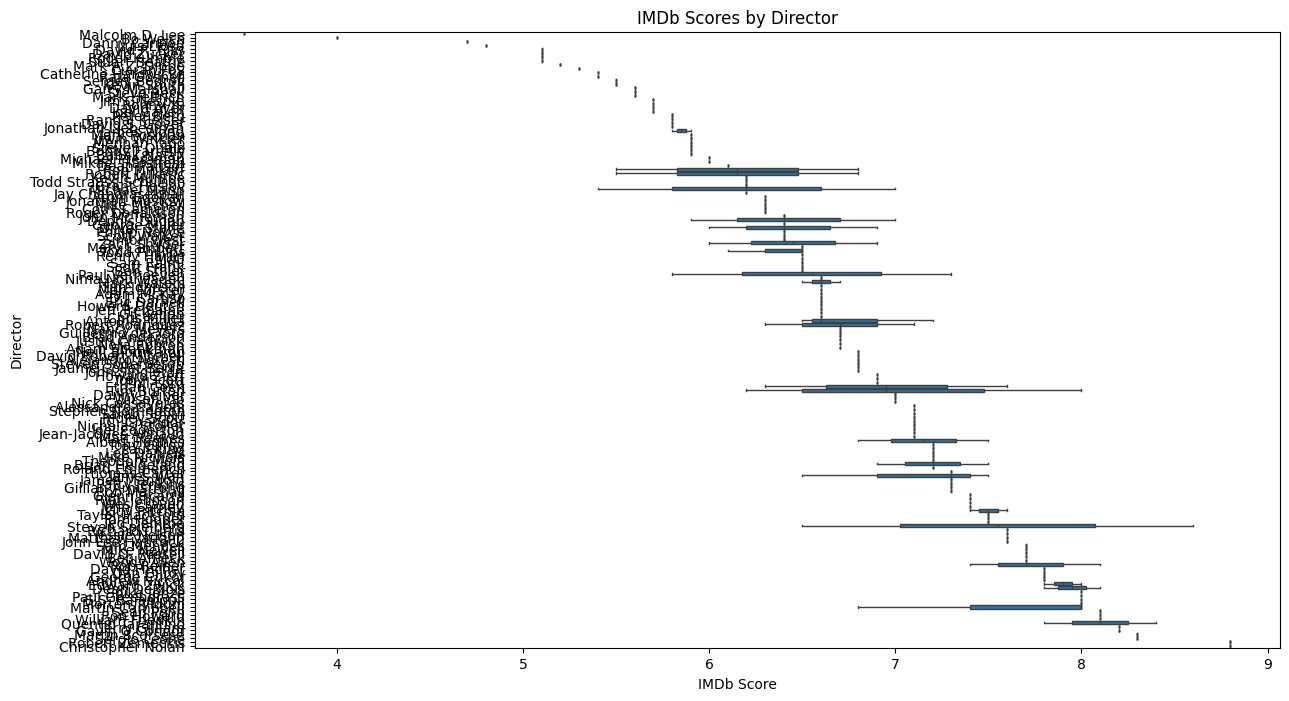

                            OLS Regression Results                            
Dep. Variable:             IMDb Score   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     241.3
Date:                Sat, 18 May 2024   Prob (F-statistic):           1.18e-44
Time:                        23:24:03   Log-Likelihood:                -602.99
No. Observations:                 500   AIC:                             1210.
Df Residuals:                     498   BIC:                             1218.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8353      0.042    163.888      0.0

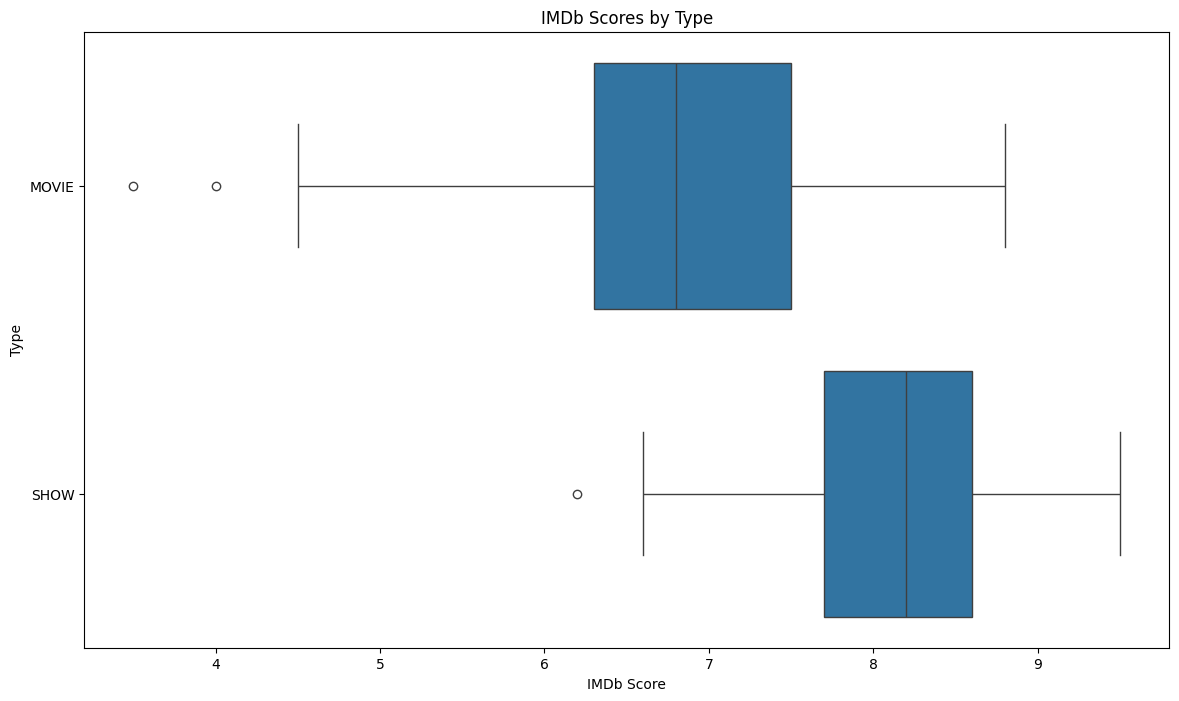

                            OLS Regression Results                            
Dep. Variable:             IMDb Score   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     1.511
Date:                Sat, 18 May 2024   Prob (F-statistic):            0.00192
Time:                        23:24:03   Log-Likelihood:                -605.76
No. Observations:                 500   AIC:                             1450.
Df Residuals:                     381   BIC:                             1951.
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

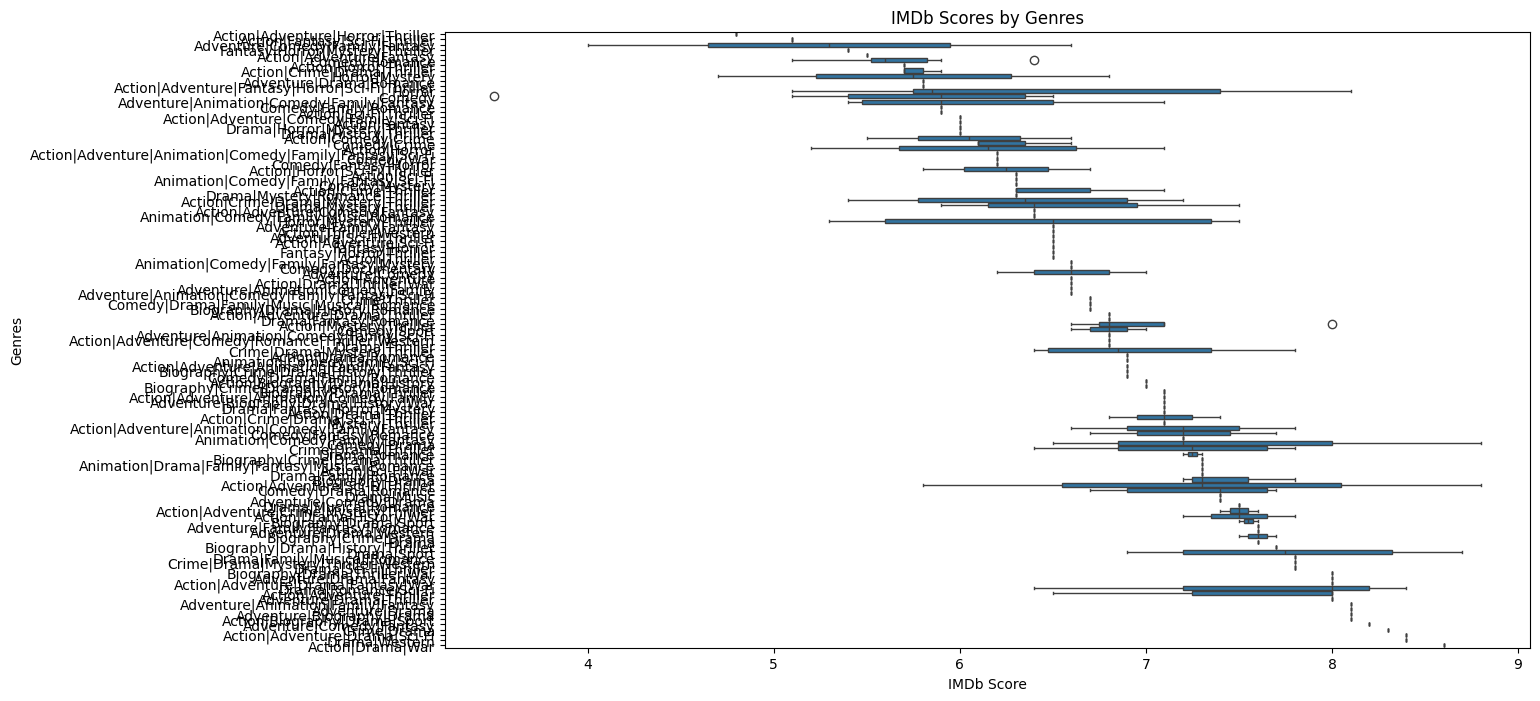

                            OLS Regression Results                            
Dep. Variable:             IMDb Score   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     32.07
Date:                Sat, 18 May 2024   Prob (F-statistic):           1.58e-40
Time:                        23:24:06   Log-Likelihood:                -596.66
No. Observations:                 500   AIC:                             1211.
Df Residuals:                     491   BIC:                             1249.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0179      0.152     46.113      0.0

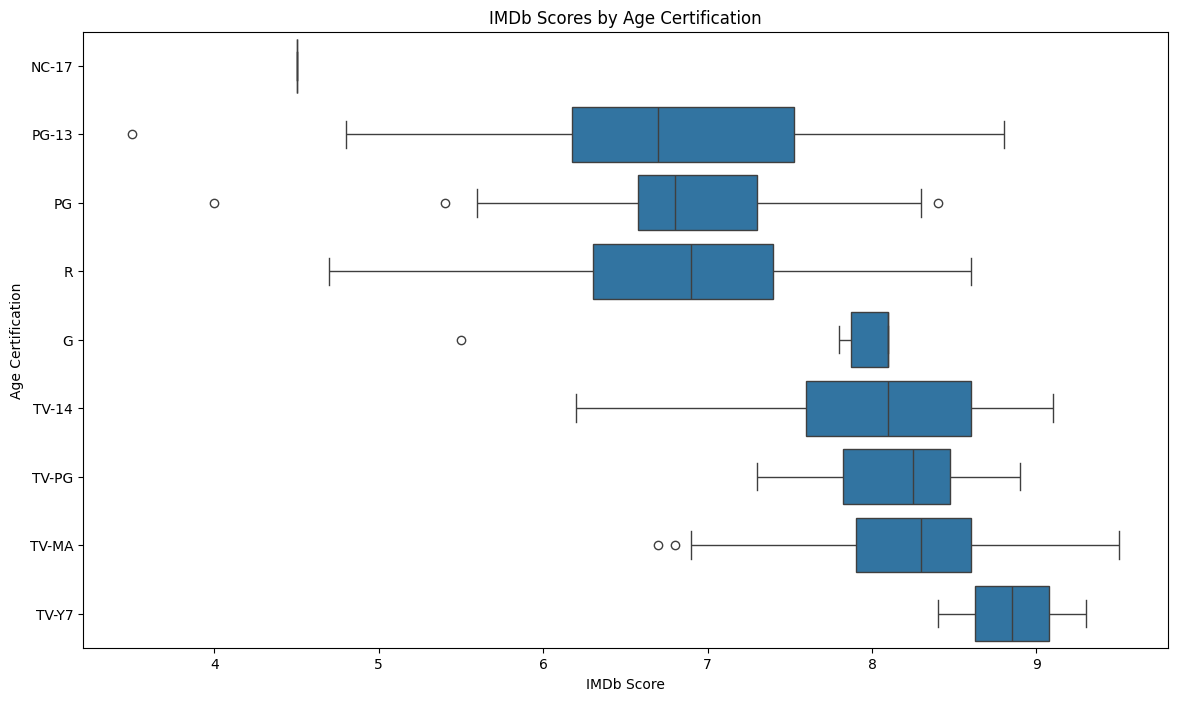

                            OLS Regression Results                            
Dep. Variable:             IMDb Score   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     1.623
Date:                Sat, 18 May 2024   Prob (F-statistic):           3.19e-23
Time:                        23:24:39   Log-Likelihood:                -2338.0
No. Observations:                3918   AIC:                             9844.
Df Residuals:                    1334   BIC:                         2.605e+04
Df Model:                        2583                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

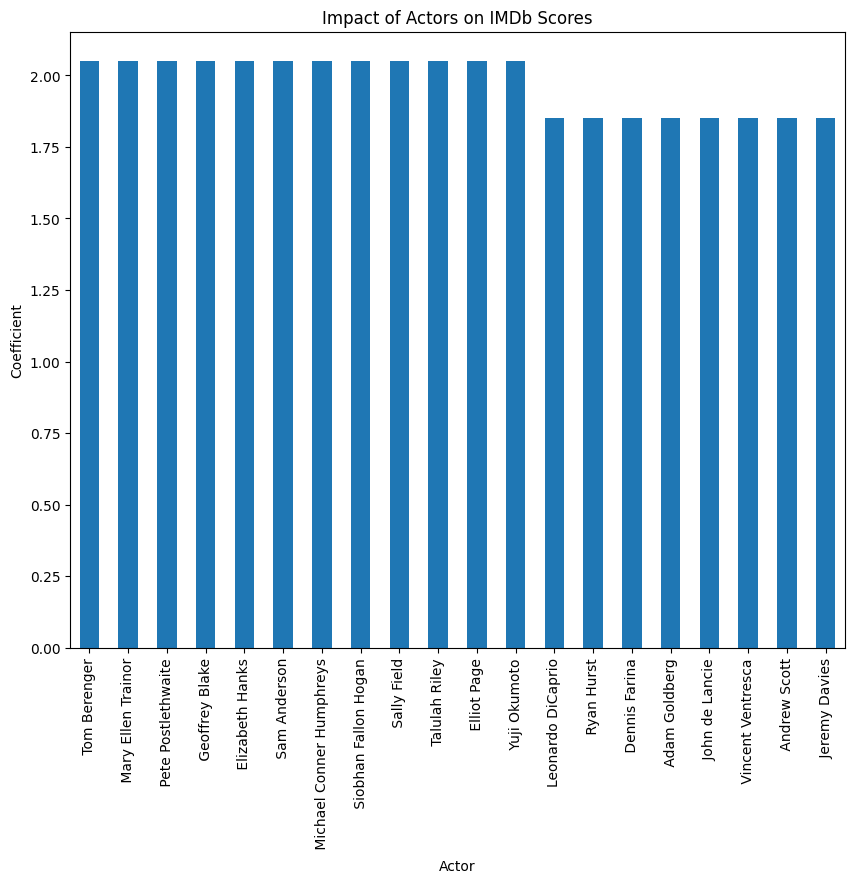

In [21]:
top_500_movies = merged_data.sort_values(by='IMDb Votes', ascending=False).head(500)
top_500_movies

correlation = top_500_movies['Runtime'].corr(top_500_movies['IMDb Score'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime', y='IMDb Score', data=top_500_movies)
plt.title(f'Runtime vs. IMDb Score (Correlation = {correlation:.2f})')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.show()

def plot_categorical_relationships(data, feature, title):

    dummies = pd.get_dummies(data[feature], drop_first=True)
    X = dummies

    X = sm.add_constant(X)
    X = X.apply(pd.to_numeric, errors='coerce') 
    X.dropna(inplace=True)  

    y = data['IMDb Score']
    y = y.reindex(X.index)
    est = sm.OLS(y.astype(float), X.astype(float)).fit() 
    print(est.summary())


    plt.figure(figsize=(14, 8))
    sorted_data = data.groupby(feature)['IMDb Score'].median().sort_values()
    sns.boxplot(x='IMDb Score', y=feature, data=data, order=sorted_data.index)
    plt.title(title)
    plt.xlabel('IMDb Score')
    plt.ylabel(feature)
    plt.show()

plot_categorical_relationships(top_500_movies, 'Director', 'IMDb Scores by Director')
plot_categorical_relationships(top_500_movies, 'Type', 'IMDb Scores by Type')
plot_categorical_relationships(top_500_movies, 'Genres', 'IMDb Scores by Genres')
plot_categorical_relationships(top_500_movies, 'Age Certification', 'IMDb Scores by Age Certification')


top_500_exploded = top_500_movies.explode('Actor')
actor_dummies = pd.get_dummies(top_500_exploded['Actor'])

X = sm.add_constant(actor_dummies)
y = top_500_exploded['IMDb Score']

model = sm.OLS(y.astype(float), X.astype(float)).fit()
print(model.summary())


actor_coefficients = model.params[1:] 
sorted_coefficients = actor_coefficients.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sorted_coefficients.head(20).plot(kind='bar')
plt.title('Impact of Actors on IMDb Scores')
plt.xlabel('Actor')
plt.ylabel('Coefficient')
plt.show()

Random Forest

RMSE: 0.51
MAE: 0.55
      Predicted IMDb Score  Actual IMDb Score
1956                 6.600                5.9
3016                 6.816                7.8
400                  6.339                7.4
396                  8.112                8.3
259                  5.937                6.5


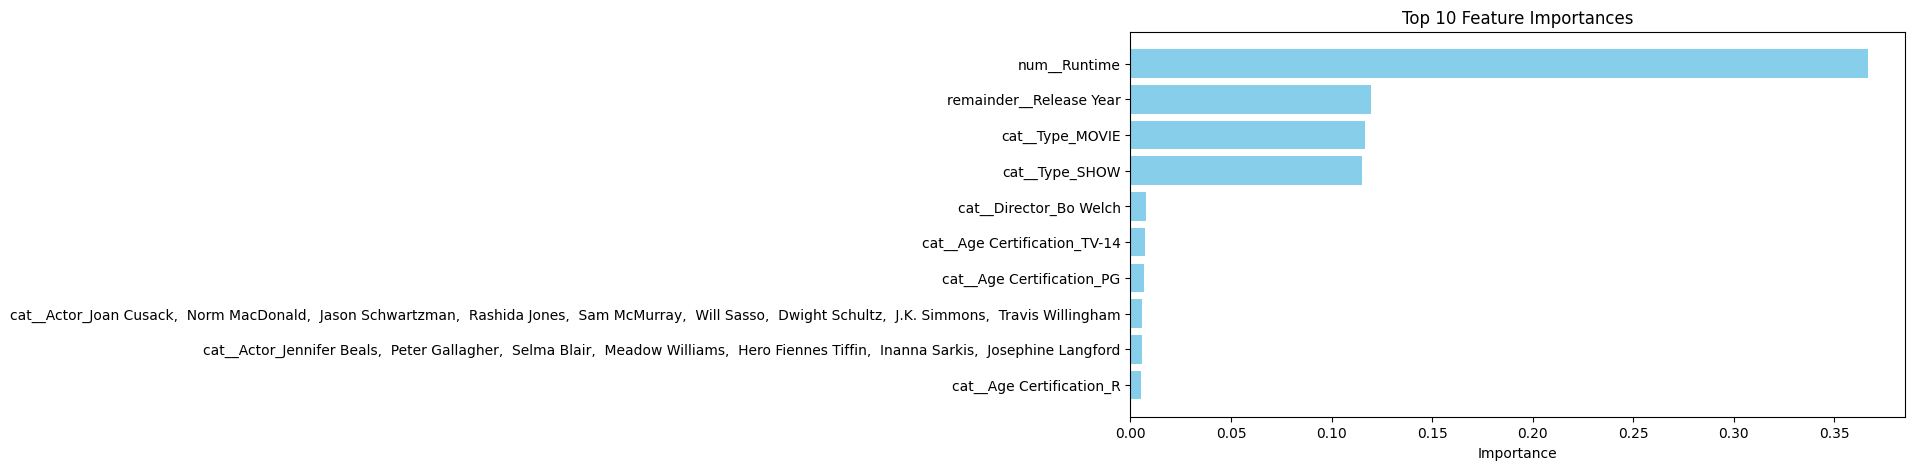

In [22]:
X = top_500_movies.drop(['IMDb Score', 'ID', 'Description', 'Title', 'IMDb ID', 'IMDb Votes', 'Index','Normalized Score'], axis=1)
y = top_500_movies['IMDb Score']

# 범주형 및 수치형 피처 명시
categorical_features = ['Type', 'Director', 'Genres', 'Country', 'Language', 'Actor', 'Age Certification']
numerical_features = ['Runtime']

# 범주형 데이터 문자열로 전환
for col in ['Actor', 'Director', 'Genres', 'Country', 'Type', 'Language']:
    X[col] = X[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# 데이터 전처리 파이프라인
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ], remainder='passthrough')

# 모델 파이프라인 구성
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# 데이터 분할 및 모델 학습
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 결과 출력
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# 예측 결과와 실제 값 비교
comparison = pd.DataFrame({'Predicted IMDb Score': y_pred, 'Actual IMDb Score': y_test})
print(comparison.head())

# 특성 중요도 시각화
feature_importances = pipeline['regressor'].feature_importances_
feature_names = preprocessor.get_feature_names_out()

top_indices = np.argsort(feature_importances)[-10:]
top_features = [feature_names[i] for i in top_indices]
top_importances = feature_importances[top_indices]

plt.figure(figsize=(10, 5))
plt.title('Top 10 Feature Importances')
plt.barh(top_features, top_importances, align='center', color='skyblue')
plt.xlabel('Importance')
plt.show()

KNN

R^2 Score: 0.38
RMSE: 0.87
      Predicted IMDb Score  Actual IMDb Score
1956                  6.40                5.9
3016                  6.78                7.8
400                   6.48                7.4
396                   7.24                8.3
259                   6.36                6.5


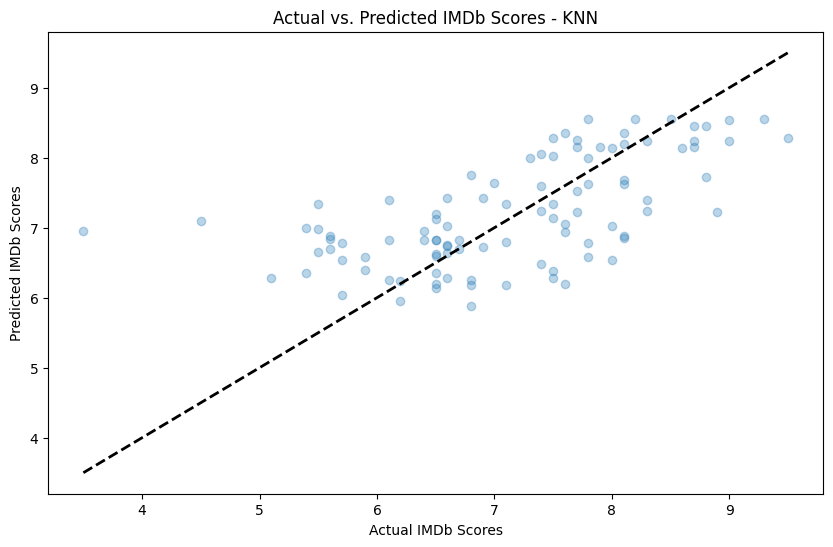

In [23]:
categorical_features = ['Actor', 'Director', 'Genres', 'Country', 'Type', 'Language','Age Certification']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 수치형 데이터에 대한 전처리기
numerical_features = ['Runtime']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 전처리 파이프라인 설정
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numerical_transformer, numerical_features)
], remainder='passthrough')

# KNN 모델 파이프라인 설정
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

# 모델 학습
knn_model.fit(X_train, y_train)

# 모델 평가
y_pred = knn_model.predict(X_test)
score = knn_model.score(X_test, y_test)
rmse = root_mean_squared_error(y_test, y_pred)

# 성능 메트릭 출력
print(f'R^2 Score: {score:.2f}')
print(f'RMSE: {rmse:.2f}')


comparison = pd.DataFrame({'Predicted IMDb Score': y_pred, 'Actual IMDb Score': y_test})
print(comparison.head())


# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual IMDb Scores')
plt.ylabel('Predicted IMDb Scores')
plt.title('Actual vs. Predicted IMDb Scores - KNN')
plt.show()

Decision tree

RMSE: 0.89
MAE: 0.70
      Predicted IMDb Score  Actual IMDb Score
1956                   6.6                5.9
3016                   6.3                7.8
400                    6.3                7.4
396                    8.1                8.3
259                    5.9                6.5


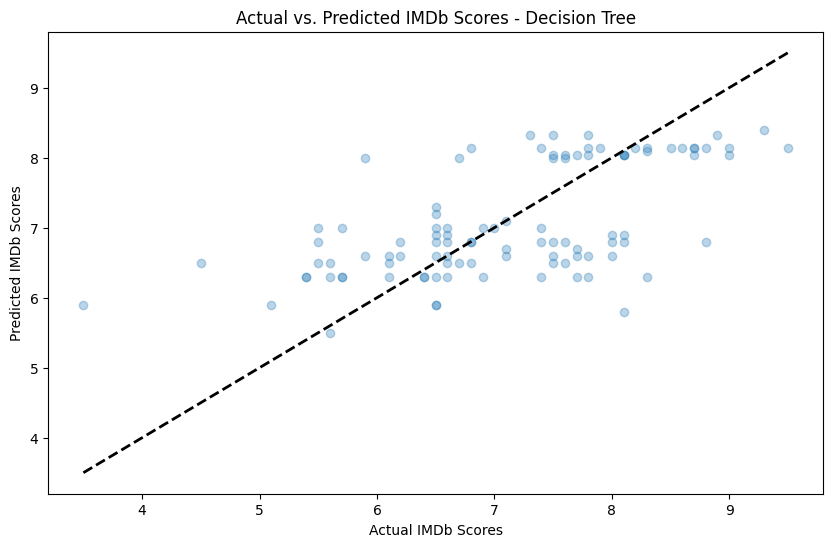

In [24]:
ategorical_features = ['Director', 'Actor', 'Genres', 'Country', 'Type', 'Language']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


comparison = pd.DataFrame({'Predicted IMDb Score': y_pred, 'Actual IMDb Score': y_test})
print(comparison.head())

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual IMDb Scores')
plt.ylabel('Predicted IMDb Scores')
plt.title('Actual vs. Predicted IMDb Scores - Decision Tree')
plt.show()

Random forest: 
RMSE: 0.51 MAE: 0.55,

KNN:
R^2 Score: 0.38 RMSE: 0.87, 

Decision Tree: 
RMSE: 0.89 MAE: 0.70

The random forest is most accurate predictor. 

Conclusion

After doing several test for finding correlations between various variables and scores, some significant influence on the scores. However, when the predictions have error as almost one point between actual score and predicted score. When the predicion made by new sample, the error is reduced.